### Project description

You’ve decided to open a small robot-run cafe in Los Angeles. The project is
promising but expensive, so you and your partners decide to try to attract
investors. They’re interested in the current market conditions—will you be able
to maintain your success when the novelty of robot waiters wears off?

You’re an analytics guru, so your partners have asked you to prepare some
market research. You have open-source data on restaurants in LA.

### Step 1. Download the data and prepare it for analysis

Download the data on restaurants in LA. Make sure that the data type for each
column is correct and that there are no missing values or duplicates. Process
them if necessary.

In [3]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [5]:
data = pd.read_csv('datasets/rest_data_us.csv') 
data

,id,object_name,address,chain,object_type,number
0,11786,HABITAT COFFEE SHOP,3708 N EAGLE ROCK BLVD,False,Cafe,26
1,11787,REILLY'S,100 WORLD WAY # 120,False,Restaurant,9
2,11788,STREET CHURROS,6801 HOLLYWOOD BLVD # 253,False,Fast Food,20
3,11789,TRINITI ECHO PARK,1814 W SUNSET BLVD,False,Restaurant,22
4,11790,POLLEN,2100 ECHO PARK AVE,False,Restaurant,20
...,...,...,...,...,...,...
9646,21432,HALL OF JUSTICE,217 W TEMPLE AVE,False,Restaurant,122
9647,21433,FIN-MELROSE,5750 MELROSE AVE,False,Restaurant,93
9648,21434,JUICY WINGZ,6741 HOLLYWOOD BLVD,True,Fast Food,15
9649,21435,MEDIDATE COFFEE,548 S SPRING ST STE 100,False,Cafe,6


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9651 entries, 0 to 9650
Data columns (total 6 columns):
id             9651 non-null int64
object_name    9651 non-null object
address        9651 non-null object
chain          9648 non-null object
object_type    9651 non-null object
number         9651 non-null int64
dtypes: int64(2), object(4)
memory usage: 452.5+ KB


Find the memory usage of each column with the .memory_usage method: 

In [7]:
original_mem = data.memory_usage(deep=True)
#original_mem

#### Make sure that the data type for each column is correct and that there are no missing values or duplicates.

In [8]:
#check for duplicates
data.duplicated().sum() 

0

In [9]:
#there are 3 missing values in the chain column. Fill with 0.
data['chain']=data['chain'].fillna(0)

In [10]:
#data.info()  #there are no more missing values

The 'chain' column contains only 0 or 1. Convert this column to an 8-bit (1 byte) integer with the .astype method: 

In [11]:
data['chain']=data['chain'].astype(np.int8)

To save even more memory, you will want to consider changing object data types to categorical if they have a reasonably low cardinality (number of unique values). Let's first check the number of unique values for the object columns: 

In [12]:
data.select_dtypes(include=["object"]).nunique()

object_name    8672
address        8517
object_type       6
dtype: int64

In [13]:
data['object_type']=data['object_type'].astype("category")

In [14]:
data.dtypes

id                int64
object_name      object
address          object
chain              int8
object_type    category
number            int64
dtype: object

In [15]:
new_mem = data.memory_usage(deep=True)
#new_mem

let's compare the original memory usage with our updated memory usage. 'object_type' is one percent of original size, 'chain' is three percent of original size.

In [16]:
new_mem / original_mem

Index          1.000000
id             1.000000
object_name    1.000164
address        1.000000
chain          0.029830
object_type    0.015968
number         1.000000
dtype: float64

Give the columns meaningful names:

In [17]:
col_map = {'object_name':'rest_name', 'object_type':'type', 'number':'seats'}
data = data.rename(columns=col_map)
data.head()

,id,rest_name,address,chain,type,seats
0,11786,HABITAT COFFEE SHOP,3708 N EAGLE ROCK BLVD,0,Cafe,26
1,11787,REILLY'S,100 WORLD WAY # 120,0,Restaurant,9
2,11788,STREET CHURROS,6801 HOLLYWOOD BLVD # 253,0,Fast Food,20
3,11789,TRINITI ECHO PARK,1814 W SUNSET BLVD,0,Restaurant,22
4,11790,POLLEN,2100 ECHO PARK AVE,0,Restaurant,20


In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9651 entries, 0 to 9650
Data columns (total 6 columns):
id           9651 non-null int64
rest_name    9651 non-null object
address      9651 non-null object
chain        9651 non-null int8
type         9651 non-null category
seats        9651 non-null int64
dtypes: category(1), int64(2), int8(1), object(2)
memory usage: 320.8+ KB


memory usage before: 452.5+ KB
    
memory usage after: 320.8+ KB

<div class="alert alert-success" role="alert">
Good start. Data was opened and examined correctly.</div>


## Step 2. Data analysis

### Investigate the proportions of the various types of establishments. Plot a graph.

In [19]:
data['type'].unique()

[Cafe, Restaurant, Fast Food, Bakery, Bar, Pizza]
Categories (6, object): [Cafe, Restaurant, Fast Food, Bakery, Bar, Pizza]

In [20]:
type_count = data['type'].value_counts()
type_count

Restaurant    7255
Fast Food     1066
Cafe           435
Pizza          320
Bar            292
Bakery         283
Name: type, dtype: int64

In [21]:
total_rest = data['type'].value_counts().sum()
total_rest

9651

In [22]:
df = (type_count / total_rest * 100).reset_index()
df

,index,type
0,Restaurant,75.173557
1,Fast Food,11.045488
2,Cafe,4.507305
3,Pizza,3.315719
4,Bar,3.025593
5,Bakery,2.932339


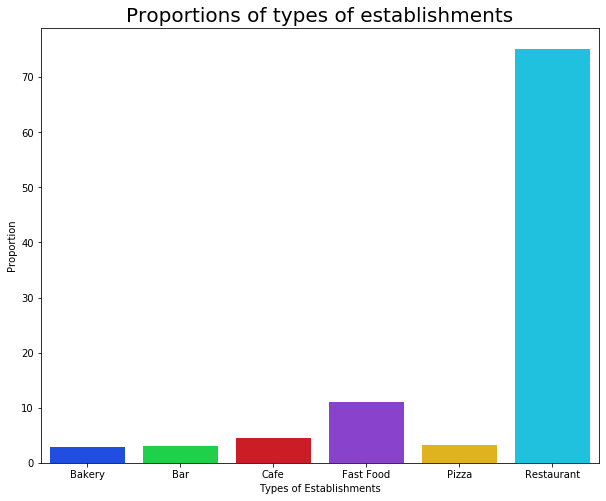

In [23]:
with plt.style.context('seaborn-bright'):
    fig, ax = plt.subplots(figsize=(10, 8))
    ax = sns.barplot(x='index', y='type', data=df)
    
    ax.set_title('Proportions of types of establishments', size=20)
    ax.set_ylabel('Proportion')
    ax.set_xlabel('Types of Establishments')

#### Conclusion: 
Seventy-five percent of establishments are classified as Restaurant. Fast Food accounts for 11% of dining choices. Cafe is 4.5%, Pizza, Bar and Bakery are almost tied with 3% each.

<div class="alert alert-success" role="alert">
Correct. Good chart.</div>

### Investigate the proportions of chain and nonchain establishments. Plot a graph.

In [24]:
chain_count = data['chain'].value_counts()
chain_count

0    5975
1    3676
Name: chain, dtype: int64

In [25]:
chain_count2 = data['chain'].value_counts().reset_index()
chain_count2

,index,chain
0,0,5975
1,1,3676


In [26]:
chain_percent = chain_count / total_rest * 100   
chain_percent

0    61.910683
1    38.089317
Name: chain, dtype: float64

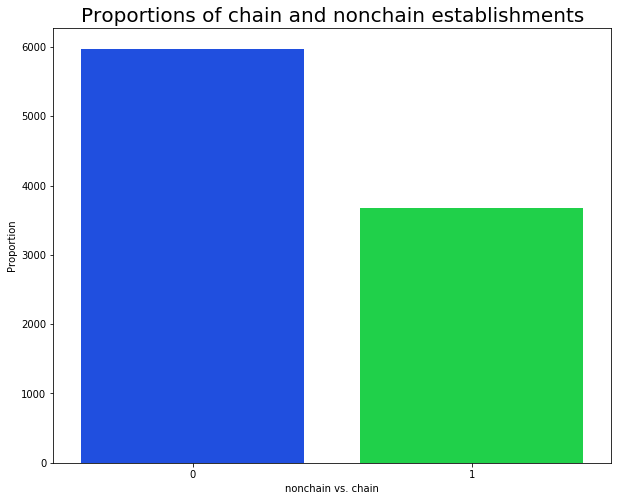

In [27]:
with plt.style.context('seaborn-bright'):
    fig, ax = plt.subplots(figsize=(10, 8))
    ax = sns.barplot(x='index', y='chain', data=chain_count2)
    
    ax.set_title('Proportions of chain and nonchain establishments', size=20)
    ax.set_ylabel('Proportion')
    ax.set_xlabel('nonchain vs. chain')

#### Conclusion: 
There are 20% more nonchain establishments than there are chain. (5975 nonchain, 3676 is chain)

### Which type of establishment is typically a chain?

In [28]:
type_is_chain = data[['chain', 'type']].query('chain == True').groupby('type').count().reset_index()
type_is_chain

,type,chain
0,Bakery,283
1,Bar,77
2,Cafe,266
3,Fast Food,605
4,Pizza,153
5,Restaurant,2292


#### Conclusion: 
The majority of establishments are classified as Restaurants.

#### Get side-by-side comparison of chain vs. not chain

In [29]:
type_not_chain = data[['chain', 'type']].query('chain == False').groupby('type').count().reset_index()
type_not_chain

,type,chain
0,Bakery,0
1,Bar,215
2,Cafe,169
3,Fast Food,461
4,Pizza,167
5,Restaurant,4963


In [30]:
side_comp = pd.merge(type_is_chain, type_not_chain, on='type') 
side_comp

,type,chain_x,chain_y
0,Bakery,283,0
1,Bar,77,215
2,Cafe,266,169
3,Fast Food,605,461
4,Pizza,153,167
5,Restaurant,2292,4963


In [31]:
col_map = {'chain_x':'chain_restaurant', 'chain_y':'not_a_chain'}
side_comp = side_comp.rename(columns=col_map)
side_comp.head()

,type,chain_restaurant,not_a_chain
0,Bakery,283,0
1,Bar,77,215
2,Cafe,266,169
3,Fast Food,605,461
4,Pizza,153,167


Text(0.5, 0, 'Establishment Type')

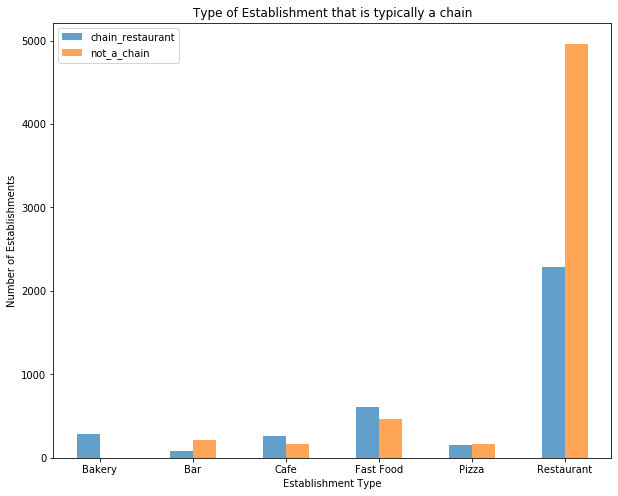

In [32]:
side_comp.plot.bar(x='type', stacked=False, rot=0, figsize=(10,8),title='Type of Establishment that is typically a chain', alpha=0.7)
plt.ylabel('Number of Establishments')
plt.xlabel('Establishment Type')

#### Conclusion: 
The categories Fast Food, Cafe and Bakery have more chains than nonchain locations. 
Bar and Restaurant locations have more than twice as many nonchains. Pizza is evenly split.

<div class="alert alert-success" role="alert">
Nice chart</div>

### What characterizes chains: many establishments with a small number of seats or a few establishments with a lot of seats?

In [33]:
# remove apostrophes
data['rest_name'] = data['rest_name'].str.replace("'", "")
#data

In [34]:
#ALL restaurants - extract name
data['no_num'] = data['rest_name'].str.extract(r"(.*[^#0-9])")
data

,id,rest_name,address,chain,type,seats,no_num
0,11786,HABITAT COFFEE SHOP,3708 N EAGLE ROCK BLVD,0,Cafe,26,HABITAT COFFEE SHOP
1,11787,REILLYS,100 WORLD WAY # 120,0,Restaurant,9,REILLYS
2,11788,STREET CHURROS,6801 HOLLYWOOD BLVD # 253,0,Fast Food,20,STREET CHURROS
3,11789,TRINITI ECHO PARK,1814 W SUNSET BLVD,0,Restaurant,22,TRINITI ECHO PARK
4,11790,POLLEN,2100 ECHO PARK AVE,0,Restaurant,20,POLLEN
...,...,...,...,...,...,...,...
9646,21432,HALL OF JUSTICE,217 W TEMPLE AVE,0,Restaurant,122,HALL OF JUSTICE
9647,21433,FIN-MELROSE,5750 MELROSE AVE,0,Restaurant,93,FIN-MELROSE
9648,21434,JUICY WINGZ,6741 HOLLYWOOD BLVD,1,Fast Food,15,JUICY WINGZ
9649,21435,MEDIDATE COFFEE,548 S SPRING ST STE 100,0,Cafe,6,MEDIDATE COFFEE


In [35]:
#extracting chain only
chain_rest_name = data.query('chain == True')  
#chain_rest_name

In [36]:
# sum of seats, group by numberless names
num_seats_by_name = chain_rest_name.groupby('no_num').agg({'seats':'sum', 'no_num':'count'}).sort_values('seats')
num_seats_by_name

,seats,no_num
no_num,,
JR BAKERY & PIZZA,1,1
NANCYS BAKERY,1,1
TRACEYS RESTAURANT,1,1
DELICE BAKERY,1,1
CAFE CON LECHE BAKERY AND CAFE,1,1
...,...,...
CARLS JR,1601,14
JACK IN THE BOX,2039,33
BURGER KING,2073,24


In [37]:
# rename column    
col_map = {'no_num':'rest_count'}
num_seats_by_name = num_seats_by_name.rename(columns=col_map)
num_seats_by_name.head()

,seats,rest_count
no_num,,
JR BAKERY & PIZZA,1,1
NANCYS BAKERY,1,1
TRACEYS RESTAURANT,1,1
DELICE BAKERY,1,1
CAFE CON LECHE BAKERY AND CAFE,1,1


In [38]:
num_seats_by_name.query('rest_count < 5').sum()

seats         107595
rest_count      2691
dtype: int64

In [39]:
# updated to mean for average number seats
num_seats_by_name.query('rest_count < 5').mean()

seats         51.554863
rest_count     1.289411
dtype: float64

In [40]:
num_seats_by_name.query('rest_count < 10').sum()

seats         114739
rest_count      2917
dtype: int64

In [41]:
# updated to mean for average number seats
num_seats_by_name.query('rest_count < 10').mean()

seats         54.020245
rest_count     1.373352
dtype: float64

In [42]:
num_seats_by_name.query('rest_count >= 10').sum()

seats         30997
rest_count      758
dtype: int64

In [43]:
# updated to mean for average number seats
num_seats_by_name.query('rest_count >= 10').mean()

seats         911.676471
rest_count     22.294118
dtype: float64

In [44]:
char_chain_cnt = num_seats_by_name.sort_values('rest_count')   
char_chain_cnt

,seats,rest_count
no_num,,
JR BAKERY & PIZZA,1,1
DELI-CIOUS,36,1
EL JOCORENO RESTAURANT,36,1
STARBUCKS (COFFEE BAR) LEVEL 1 - UCLA,36,1
ANAR INDIAN RESTAURANT,36,1
...,...,...
JACK IN THE BOX,2039,33
MCDONALDS,4779,47
THE COFFEE BEAN & TEA LEAF,1256,47


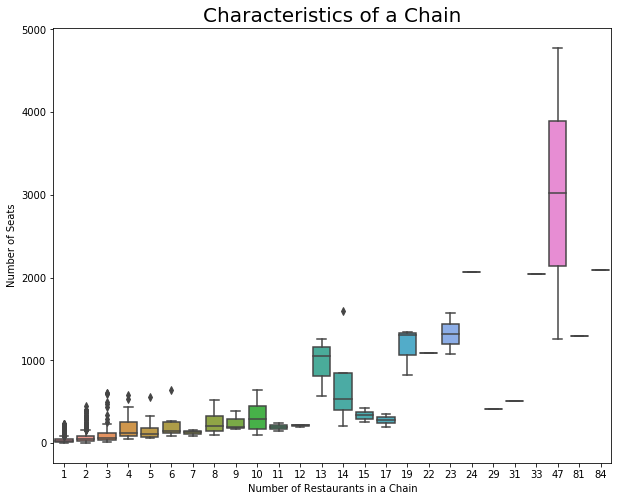

In [45]:
with plt.style.context('seaborn-bright'):
    fig, ax = plt.subplots(figsize=(10, 8))
    ax = sns.boxplot(x='rest_count', y='seats', data=char_chain_cnt)
    
    ax.set_title('Characteristics of a Chain', size=20)
    
    ax.set_ylabel('Number of Seats')
    ax.set_xlabel('Number of Restaurants in a Chain') 

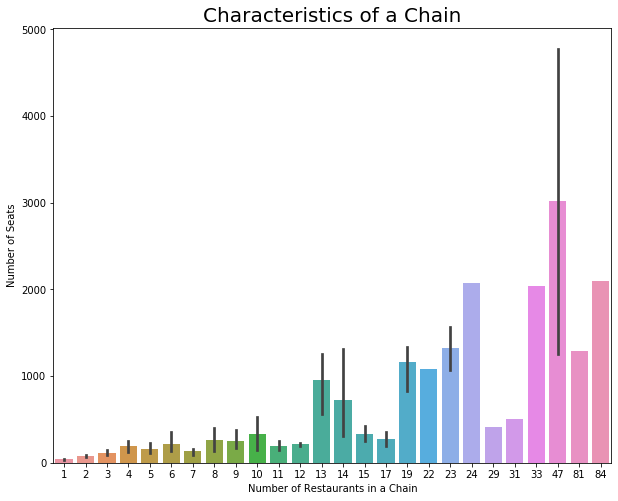

In [46]:
with plt.style.context('seaborn-bright'):
    fig, ax = plt.subplots(figsize=(10, 8))
    ax = sns.barplot(x='rest_count', y='seats', data=char_chain_cnt)
    
    ax.set_title('Characteristics of a Chain', size=20)
    
    ax.set_ylabel('Number of Seats')
    ax.set_xlabel('Number of Restaurants in a Chain') 

<div class="alert alert-danger" role="alert">
<s>Didn't catch the idea of this chart. Can you please provide a small conclusion. What are you comparing and what is happening.</s></div>

<div class="alert alert-success" role="alert">
Well OK :)</div>

#### Updated Conclusion:
I had originally made a bar chart, but I did not think the representation of the upper numbers was helpful. There is only one chain with 84 locations (Starbucks) and only one with 81 locations (Subway). The next highest is McDonalds with 47 locations, but McDonalds has the most seats at 4779. Starbucks with 84 stores has the next highest seat count at 2095 seats. 
Changing barplot to boxplot made the high numbers appear more like outliers which they are.

The task did not actually specify to make a chart, and here the results of the three queries 'rest_count < 5', < 10 and >= 10 showed more clearly what we are looking for. 

#### Conclusion:
Chains are characterized by "Few establishments with a high number of seats". This graph shows that the chains with the most number of locations are more like outliers/anomalies.

In the queries above, restaurants with fewer than five locations contain the most seats. Changing number of locations to less than ten did not increase the count much.

There are only 34 rows with restaurants with ten or higher locations. There are 2124 rows with fewer than 10.
The 2124 rows definitely have the highest number of seats.

I added the average calculations and that is confusing in this case, because McDonalds has 4779 seats which is more than double Starbucks with the next highest seat count at 2095 seats. McDonalds is throwing off the average.

#### Total Seats by Type (to compare with average seats by type)

In [48]:
is_chain = data.query('chain == True')
is_chain

,id,rest_name,address,chain,type,seats,no_num
8,11794,ABC DONUTS,3027 N SAN FERNANDO RD UNIT 103,1,Fast Food,1,ABC DONUTS
10,11796,EL POLLO LOCO,5319 W SUNSET BLVD,1,Restaurant,38,EL POLLO LOCO
11,11797,POONG NYUN BAKERY,928 S WESTERN AVE STE 109,1,Bakery,17,POONG NYUN BAKERY
12,11798,EMC RESTAURANT GROUP LLC,3500 W 6TH ST STE 101,1,Restaurant,133,EMC RESTAURANT GROUP LLC
14,11800,CUSCATLECA BAKERY,2501 W SUNSET BLVD #A,1,Bakery,26,CUSCATLECA BAKERY
...,...,...,...,...,...,...,...
9629,21415,JUCUAPA BAKERY,2810 JAMES WOOD BLVD,1,Bakery,10,JUCUAPA BAKERY
9636,21422,CHIPOTLE #3094,6719 LA TIJERA BLVD # A-B,1,Restaurant,47,CHIPOTLE
9639,21425,MCDONALDS,1800 S WESTERN AVE,1,Fast Food,135,MCDONALDS
9648,21434,JUICY WINGZ,6741 HOLLYWOOD BLVD,1,Fast Food,15,JUICY WINGZ


In [49]:
#chains, group by type total # of seats
num_seats = is_chain.groupby('type').agg({'seats':'sum'}).reset_index()
#um_seats

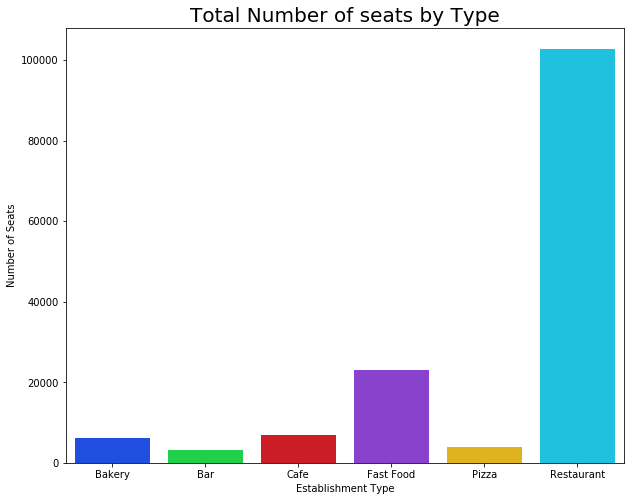

In [50]:
with plt.style.context('seaborn-bright'):
    fig, ax = plt.subplots(figsize=(10, 8))
    ax = sns.barplot(x='type', y='seats', data=num_seats)
    
    ax.set_title('Total Number of seats by Type', size=20)
    
    ax.set_ylabel('Number of Seats')
    ax.set_xlabel('Establishment Type')

#### Conclusion: 
Restaurant is the absolute highest with 102,810 seats. Fast Food has 23,044. Cafe and Bakery have 6894 and 6162 making them close to a tie for third. Fourth is Pizza with 3906 seats. The least number of seats is the Bar with 3100.

### Determine the average number of seats for each type of restaurant. On average, which type of restaurant has the greatest number of seats? Plot graphs.

In [51]:
avg_num_seats = data.groupby('type').agg({'seats':'mean'}).reset_index()
avg_num_seats

,type,seats
0,Bakery,21.773852
1,Bar,44.767123
2,Cafe,25.000000
3,Fast Food,31.837711
4,Pizza,28.459375
5,Restaurant,48.042316


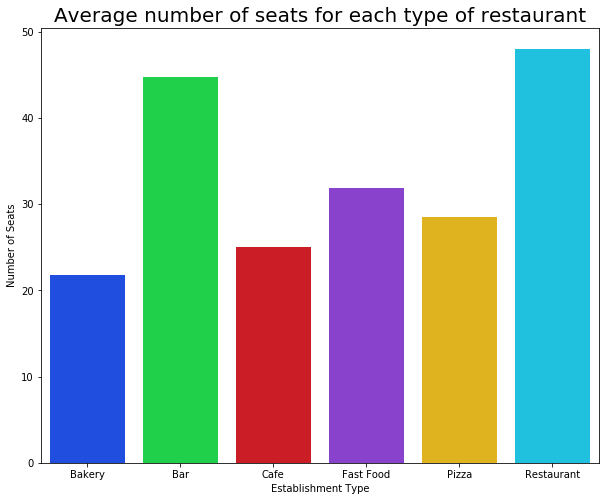

In [52]:
with plt.style.context('seaborn-bright'):
    fig, ax = plt.subplots(figsize=(10, 8))
    ax = sns.barplot(x='type', y='seats', data=avg_num_seats)
    
    ax.set_title('Average number of seats for each type of restaurant', size=20)
    
    ax.set_ylabel('Number of Seats')
    ax.set_xlabel('Establishment Type')

#### Conclusion:

Restaurants have the most seats at 48, but Bars are a close second with 44. Bakeries have the fewest average number of seats, but most bakery purchases are 'to go', so they don't need a large number of seats.

### Put the data on street names from the address column in a separate column.

In [53]:
data['street_name'] = data['address'].str.extract(r"([^0-9]\w+ .*)")
data

,id,rest_name,address,chain,type,seats,no_num,street_name
0,11786,HABITAT COFFEE SHOP,3708 N EAGLE ROCK BLVD,0,Cafe,26,HABITAT COFFEE SHOP,N EAGLE ROCK BLVD
1,11787,REILLYS,100 WORLD WAY # 120,0,Restaurant,9,REILLYS,WORLD WAY # 120
2,11788,STREET CHURROS,6801 HOLLYWOOD BLVD # 253,0,Fast Food,20,STREET CHURROS,HOLLYWOOD BLVD # 253
3,11789,TRINITI ECHO PARK,1814 W SUNSET BLVD,0,Restaurant,22,TRINITI ECHO PARK,W SUNSET BLVD
4,11790,POLLEN,2100 ECHO PARK AVE,0,Restaurant,20,POLLEN,ECHO PARK AVE
...,...,...,...,...,...,...,...,...
9646,21432,HALL OF JUSTICE,217 W TEMPLE AVE,0,Restaurant,122,HALL OF JUSTICE,W TEMPLE AVE
9647,21433,FIN-MELROSE,5750 MELROSE AVE,0,Restaurant,93,FIN-MELROSE,MELROSE AVE
9648,21434,JUICY WINGZ,6741 HOLLYWOOD BLVD,1,Fast Food,15,JUICY WINGZ,HOLLYWOOD BLVD
9649,21435,MEDIDATE COFFEE,548 S SPRING ST STE 100,0,Cafe,6,MEDIDATE COFFEE,S SPRING ST STE 100


##### strip numbers from end

In [54]:
# strip numbers from end
data['no_num_street'] = data['address'].str.extract(r"(.*[^#0-9])")
data

,id,rest_name,address,chain,type,seats,no_num,street_name,no_num_street
0,11786,HABITAT COFFEE SHOP,3708 N EAGLE ROCK BLVD,0,Cafe,26,HABITAT COFFEE SHOP,N EAGLE ROCK BLVD,3708 N EAGLE ROCK BLVD
1,11787,REILLYS,100 WORLD WAY # 120,0,Restaurant,9,REILLYS,WORLD WAY # 120,100 WORLD WAY #
2,11788,STREET CHURROS,6801 HOLLYWOOD BLVD # 253,0,Fast Food,20,STREET CHURROS,HOLLYWOOD BLVD # 253,6801 HOLLYWOOD BLVD #
3,11789,TRINITI ECHO PARK,1814 W SUNSET BLVD,0,Restaurant,22,TRINITI ECHO PARK,W SUNSET BLVD,1814 W SUNSET BLVD
4,11790,POLLEN,2100 ECHO PARK AVE,0,Restaurant,20,POLLEN,ECHO PARK AVE,2100 ECHO PARK AVE
...,...,...,...,...,...,...,...,...,...
9646,21432,HALL OF JUSTICE,217 W TEMPLE AVE,0,Restaurant,122,HALL OF JUSTICE,W TEMPLE AVE,217 W TEMPLE AVE
9647,21433,FIN-MELROSE,5750 MELROSE AVE,0,Restaurant,93,FIN-MELROSE,MELROSE AVE,5750 MELROSE AVE
9648,21434,JUICY WINGZ,6741 HOLLYWOOD BLVD,1,Fast Food,15,JUICY WINGZ,HOLLYWOOD BLVD,6741 HOLLYWOOD BLVD
9649,21435,MEDIDATE COFFEE,548 S SPRING ST STE 100,0,Cafe,6,MEDIDATE COFFEE,S SPRING ST STE 100,548 S SPRING ST STE


##### strip numbers from front

In [55]:
data['alpha_street_name'] = data['no_num_street'].str.extract(r"([^0-9]\w+ .*)")
data

,id,rest_name,address,chain,type,seats,no_num,street_name,no_num_street,alpha_street_name
0,11786,HABITAT COFFEE SHOP,3708 N EAGLE ROCK BLVD,0,Cafe,26,HABITAT COFFEE SHOP,N EAGLE ROCK BLVD,3708 N EAGLE ROCK BLVD,N EAGLE ROCK BLVD
1,11787,REILLYS,100 WORLD WAY # 120,0,Restaurant,9,REILLYS,WORLD WAY # 120,100 WORLD WAY #,WORLD WAY #
2,11788,STREET CHURROS,6801 HOLLYWOOD BLVD # 253,0,Fast Food,20,STREET CHURROS,HOLLYWOOD BLVD # 253,6801 HOLLYWOOD BLVD #,HOLLYWOOD BLVD #
3,11789,TRINITI ECHO PARK,1814 W SUNSET BLVD,0,Restaurant,22,TRINITI ECHO PARK,W SUNSET BLVD,1814 W SUNSET BLVD,W SUNSET BLVD
4,11790,POLLEN,2100 ECHO PARK AVE,0,Restaurant,20,POLLEN,ECHO PARK AVE,2100 ECHO PARK AVE,ECHO PARK AVE
...,...,...,...,...,...,...,...,...,...,...
9646,21432,HALL OF JUSTICE,217 W TEMPLE AVE,0,Restaurant,122,HALL OF JUSTICE,W TEMPLE AVE,217 W TEMPLE AVE,W TEMPLE AVE
9647,21433,FIN-MELROSE,5750 MELROSE AVE,0,Restaurant,93,FIN-MELROSE,MELROSE AVE,5750 MELROSE AVE,MELROSE AVE
9648,21434,JUICY WINGZ,6741 HOLLYWOOD BLVD,1,Fast Food,15,JUICY WINGZ,HOLLYWOOD BLVD,6741 HOLLYWOOD BLVD,HOLLYWOOD BLVD
9649,21435,MEDIDATE COFFEE,548 S SPRING ST STE 100,0,Cafe,6,MEDIDATE COFFEE,S SPRING ST STE 100,548 S SPRING ST STE,S SPRING ST STE


##### I recalculated the street names for greater accuracy and discovered almost all of my original calculations did not change.
The only change was streets with one restaurant is now 1111 instead of 1994.

### Plot a graph of the top ten streets by number of restaurants.

In [56]:
is_rest = data.query('type == "Restaurant"')
is_rest

,id,rest_name,address,chain,type,seats,no_num,street_name,no_num_street,alpha_street_name
1,11787,REILLYS,100 WORLD WAY # 120,0,Restaurant,9,REILLYS,WORLD WAY # 120,100 WORLD WAY #,WORLD WAY #
3,11789,TRINITI ECHO PARK,1814 W SUNSET BLVD,0,Restaurant,22,TRINITI ECHO PARK,W SUNSET BLVD,1814 W SUNSET BLVD,W SUNSET BLVD
4,11790,POLLEN,2100 ECHO PARK AVE,0,Restaurant,20,POLLEN,ECHO PARK AVE,2100 ECHO PARK AVE,ECHO PARK AVE
5,11791,THE SPOT GRILL,10004 NATIONAL BLVD,0,Restaurant,14,THE SPOT GRILL,NATIONAL BLVD,10004 NATIONAL BLVD,NATIONAL BLVD
6,11792,CPK,100 WORLD WAY # 126,0,Restaurant,100,CPK,WORLD WAY # 126,100 WORLD WAY #,WORLD WAY #
...,...,...,...,...,...,...,...,...,...,...
9643,21429,DIVINE DIPS,601 S LOS ANGELES ST,0,Restaurant,25,DIVINE DIPS,S LOS ANGELES ST,601 S LOS ANGELES ST,S LOS ANGELES ST
9645,21431,SAINT MARC,10250 SANTA MONICA BLVD # 1025,0,Restaurant,225,SAINT MARC,SANTA MONICA BLVD # 1025,10250 SANTA MONICA BLVD #,SANTA MONICA BLVD #
9646,21432,HALL OF JUSTICE,217 W TEMPLE AVE,0,Restaurant,122,HALL OF JUSTICE,W TEMPLE AVE,217 W TEMPLE AVE,W TEMPLE AVE
9647,21433,FIN-MELROSE,5750 MELROSE AVE,0,Restaurant,93,FIN-MELROSE,MELROSE AVE,5750 MELROSE AVE,MELROSE AVE


In [57]:
top_ten_rest = is_rest['street_name'].value_counts().head(10).reset_index()
top_ten_rest

,index,street_name
0,W PICO BLVD,218
1,W SUNSET BLVD,217
2,HOLLYWOOD BLVD,136
3,WILSHIRE BLVD,131
4,W 3RD ST,119
5,S VERMONT AVE,107
6,W OLYMPIC BLVD,107
7,SANTA MONICA BLVD,107
8,MELROSE AVE,106
9,BEVERLY BLVD,103


In [58]:
# same result using new column
top_ten_rest_alpha = is_rest['alpha_street_name'].value_counts().head(10).reset_index()
top_ten_rest_alpha

,index,alpha_street_name
0,W PICO BLVD,218
1,W SUNSET BLVD,217
2,HOLLYWOOD BLVD,136
3,WILSHIRE BLVD,131
4,W 3RD ST,119
5,S VERMONT AVE,107
6,W OLYMPIC BLVD,107
7,SANTA MONICA BLVD,107
8,MELROSE AVE,106
9,BEVERLY BLVD,103


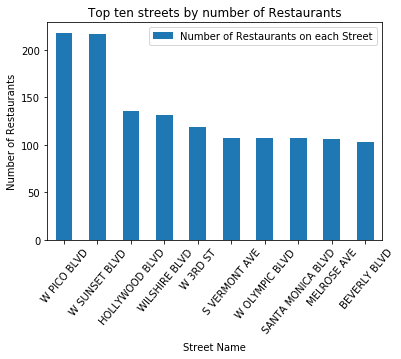

In [59]:
top_ten_rest.plot.bar(x='index', y='street_name', rot=50, title='Top ten streets by number of Restaurants', label='Number of Restaurants on each Street')
plt.xlabel('Street Name')
plt.ylabel('Number of Restaurants')
plt.legend() 
plt.show()

#### Conclusion: 
W Sunset and W Pico have the most restaurants. Hollywood Blvd and Wilshire Blvd are the next most populated with restaurants. The remaining streets have approx. 100 locations each.

<div class="alert alert-success" role="alert">
Great.</div>

### Find the number of streets that only have one restaurant.

In [60]:
count_one = is_rest['street_name'].value_counts().reset_index()
count_one

,index,street_name
0,W PICO BLVD,218
1,W SUNSET BLVD,217
2,HOLLYWOOD BLVD,136
3,WILSHIRE BLVD,131
4,W 3RD ST,119
...,...,...
2493,W 6TH ST STE 102,1
2494,CENTURY PARK E # J,1
2495,WILSHIRE BLVD STE A11,1
2496,BEVERLY BLVD STE #5,1


In [61]:
count_one_alpha = is_rest['alpha_street_name'].value_counts().reset_index()
count_one_alpha

,index,alpha_street_name
0,W PICO BLVD,218
1,W SUNSET BLVD,217
2,HOLLYWOOD BLVD,136
3,WILSHIRE BLVD,131
4,W 3RD ST,119
...,...,...
1673,FRANCISCO ST,1
1674,/4 FAIR PARK AVE,1
1675,HILGARD AVE 2FL,1
1676,W 6TH ST STE 8B,1


In [62]:
one_on_street = count_one.query('street_name < 2')
one_on_street

,index,street_name
504,S BROADWAY STE GL-10,1
505,S WESTMORELAND AVE,1
506,SANTA MONICA BLVD # 16-17,1
507,STA MON BLVD STE FC14,1
508,S NEWITT ST,1
...,...,...
2493,W 6TH ST STE 102,1
2494,CENTURY PARK E # J,1
2495,WILSHIRE BLVD STE A11,1
2496,BEVERLY BLVD STE #5,1


In [63]:
one_on_street_alpha = count_one_alpha.query('alpha_street_name < 2')
one_on_street_alpha

,index,alpha_street_name
567,S ALAMEDA ST # #AA,1
568,N VINE ST # #7A,1
569,PRODUCE ROW,1
570,AVENUE OF THE STARS,1
571,N CHEROKEE AVE,1
...,...,...
1673,FRANCISCO ST,1
1674,/4 FAIR PARK AVE,1
1675,HILGARD AVE 2FL,1
1676,W 6TH ST STE 8B,1


In [64]:
one_on_street_sum = one_on_street['street_name'].sum()
one_on_street_sum

1994

In [65]:
one_on_street_alpha_sum = one_on_street_alpha['alpha_street_name'].sum()
one_on_street_alpha_sum

1111

#### Conclusion: 
There are 1994 streets with only one restaurant.

#### Update Conclusion:

There are 1111 streets with only one restaurant.


### For streets with a lot of restaurants, look at the distribution of the number of seats. What trends can you see?

In [66]:
is_rest.head()

,id,rest_name,address,chain,type,seats,no_num,street_name,no_num_street,alpha_street_name
1,11787,REILLYS,100 WORLD WAY # 120,0,Restaurant,9,REILLYS,WORLD WAY # 120,100 WORLD WAY #,WORLD WAY #
3,11789,TRINITI ECHO PARK,1814 W SUNSET BLVD,0,Restaurant,22,TRINITI ECHO PARK,W SUNSET BLVD,1814 W SUNSET BLVD,W SUNSET BLVD
4,11790,POLLEN,2100 ECHO PARK AVE,0,Restaurant,20,POLLEN,ECHO PARK AVE,2100 ECHO PARK AVE,ECHO PARK AVE
5,11791,THE SPOT GRILL,10004 NATIONAL BLVD,0,Restaurant,14,THE SPOT GRILL,NATIONAL BLVD,10004 NATIONAL BLVD,NATIONAL BLVD
6,11792,CPK,100 WORLD WAY # 126,0,Restaurant,100,CPK,WORLD WAY # 126,100 WORLD WAY #,WORLD WAY #


In [67]:
# distribution of seats by street name
seats_dist = is_rest.groupby('street_name')['seats'].sum().nlargest(10).reset_index() 
seats_dist

,street_name,seats
0,W SUNSET BLVD,12088
1,W PICO BLVD,9857
2,WILSHIRE BLVD,8786
3,HOLLYWOOD BLVD,7948
4,W OLYMPIC BLVD,6382
5,MELROSE AVE,5853
6,W 3RD ST,5671
7,BEVERLY BLVD,5343
8,S FIGUEROA ST,5316
9,S VERMONT AVE,5119


In [68]:
# distribution of seats by street name
seats_dist_alpha = is_rest.groupby('alpha_street_name')['seats'].sum().nlargest(10).reset_index() 
seats_dist_alpha

,alpha_street_name,seats
0,W SUNSET BLVD,12088
1,W PICO BLVD,9857
2,WILSHIRE BLVD,8786
3,HOLLYWOOD BLVD,7948
4,W OLYMPIC BLVD,6382
5,MELROSE AVE,5853
6,W 3RD ST,5671
7,BEVERLY BLVD,5343
8,S FIGUEROA ST,5316
9,S VERMONT AVE,5119


In [69]:
# average distribution of seats by street name 
avg_seats_dist = is_rest.groupby('street_name')['seats'].mean().nlargest(10).reset_index() 
avg_seats_dist

,street_name,seats
0,MOUNTAIN GATE DR,229.0
1,MULHOOLAND DR,229.0
2,W SUNSET BLVD STE 233,228.0
3,WILSHIRE BLVD STE #1,228.0
4,S FLOWER ST 51ST,227.0
5,WILSHIRE BLVD STE 123,227.0
6,S BURLINGAME AVE,226.0
7,W OLYMPIC BLVD STE 202,226.0
8,HOLLYWOOD BLVD FL 1ST F,225.0
9,N SYCAMORE AVE,225.0


In [70]:
# average distribution of seats by street name alpha
avg_seats_dist_alpha = is_rest.groupby('alpha_street_name')['seats'].mean().nlargest(10).reset_index() 
avg_seats_dist_alpha

,alpha_street_name,seats
0,MOUNTAIN GATE DR,229.0
1,MULHOOLAND DR,229.0
2,S FLOWER ST 51ST,227.0
3,S BURLINGAME AVE,226.0
4,HOLLYWOOD BLVD FL 1ST F,225.0
5,N SYCAMORE AVE,225.0
6,NAUD ST,225.0
7,N AVENUE 56 2ND FL,222.0
8,THE GROVE DR # G,222.0
9,CENTER DR,221.0


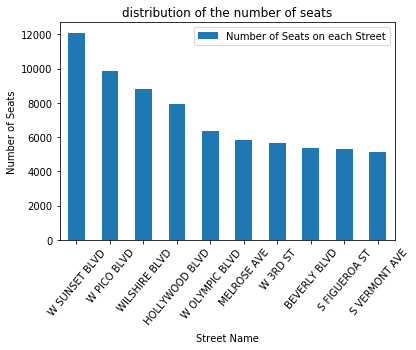

In [71]:
seats_dist.plot.bar(x='street_name', y='seats', rot=50, title='distribution of the number of seats', label='Number of Seats on each Street')
plt.xlabel('Street Name')
plt.ylabel('Number of Seats')
plt.legend() 
plt.show()

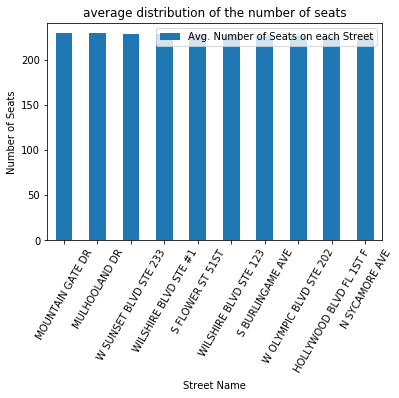

In [72]:
avg_seats_dist.plot.bar(x='street_name', y='seats', rot=60, title='average distribution of the number of seats', label='Avg. Number of Seats on each Street')
plt.xlabel('Street Name')
plt.ylabel('Number of Seats')
plt.legend() 
plt.show()

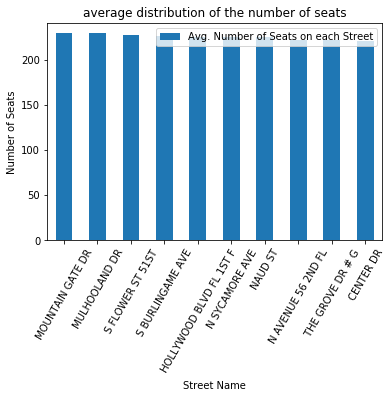

In [69]:
avg_seats_dist_alpha.plot.bar(x='alpha_street_name', y='seats', rot=60, title='average distribution of the number of seats', label='Avg. Number of Seats on each Street')
plt.xlabel('Street Name')
plt.ylabel('Number of Seats')
plt.legend() 
plt.show()

#### Conclusion:

The average number of restaurants by street should display as a table, not as a graph. A graph was not actually requested.

The average number of seats on a street is 225. The top ten average is quite a bit different than the top ten actual count regarding which streets are in top ten.

### Draw an overall conclusion and provide recommendations on restaurant type and number of seats. Comment on the possibility of developing a chain.

W Sunset and W Pico have the most seats as well as the most restaurants. Competition might be high, but there would be a lot of foot traffic and people going to the W Sunset or W Pico areas to eat. In my experience, if there is a long wait time for a restaurant, people start checking neighboring restaurants, so being in a more restaurant-dense area is recommended.



My recommendation is the type should be Restaurant with the following features: an enclosed outdoor section extending onto the sidewalk or an enclosed patio in back. The average number of seats in a Restaurant or Bar is 50. I think we should start with 50 seats in a combination of 30 inside and 20 outside. This is Los Angeles and the weather is warm most of the year.


I recommend expanding this robot-run restaurant beyond just the restaurant itself. Because we can gather a lot of data on every customer interaction, we will offer additional services and software. I gave an example name "rCafe" for the software and service.

BIG DATA ANALYSIS & MANAGEMENT
rCafe can offer an end-to-end value chain management service for data in terms of data acquisition, storage, and analysis.
rCafe makes the analysis process more intelligent, and companies can discover effective information from the massive data to obtain better business value.

CUSTOMIZED, CLOUD-BASED, INTELLIGENT HUMANOID SERVICE ROBOT
rCafe is a cloud-based intelligent humanoid robot that provides a new generation with service applications for a variety of industries and domestic environments.

FACIAL RECOGNITION
98% high recognition rate. It identifies faces in milliseconds. rCafe is an open source platform which lets you implement 3rd party resources for emotion detection, gender, age, etc.


The additional services described above can be sold to a variety of industries, creating a robustness for this portfolio. This should be developed as a chain, not limiting the idea to restaurants. 

Source for the Additional Services: https://www.robotcafe.co/  

The project description says we are opening "a small robot-run cafe". I looked up the definition of Cafe and this is what I found:

Cafe | Definition of Cafe at Dictionary.com
https://www.dictionary.com/browse/cafe

A restaurant, often with an enclosed or outdoor section extending onto the sidewalk. a restaurant, usually small and unpretentious. a barroom, cabaret, or nightclub.


### Step 3. Preparing a presentation

Make a presentation of your research to share with investors. You can use any
tool you’d like to create it, but you must convert your presentation to PDF
format for assessment. Include a link to the presentation in a markdown cell in
the following format:
Presentation: <link to cloud storage>
Follow the formatting guidelines from the “Preparing Presentations” chapter.

Presentation: https://github.com/sking-quality/Project/blob/master/Robot%20Caf%C3%A9.pdf